<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/Convolutional_Neural_Network_(Using_TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Digit Classifier - MNIST Dataset

We will build and train a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify handwritten digits (0–9) from the MNIST dataset.

## The MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits. It is widely used for training various image processing systems. The dataset consists of:

*   **60,000 training images:** Used to train the machine learning model.
*   **10,000 testing images:** Used to evaluate the performance of the trained model.

Each image is a grayscale image of size 28x28 pixels and represents a single handwritten digit from 0 to 9. The dataset is pre-divided into training and testing sets, making it convenient for evaluating model generalization.

In [3]:
# Dependencies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add channel dimension (grayscale → 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Build the CNN Model

In [18]:
model = models.Sequential([
    Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Here are some common alternatives for the parameters used above:

**Optimizers:**

*   **SGD (Stochastic Gradient Descent):** A basic but often effective optimizer.
*   **RMSprop:** An optimizer that adapts the learning rate for each parameter.
*   **Adagrad:** Another adaptive learning rate optimizer, good for sparse data.
*   **Adadelta:** An extension of Adagrad that addresses its diminishing learning rate problem.
*   **Adamax:** A variant of `adam` based on the infinity norm.
*   **Nadam:** Adam with Nesterov momentum.

**Loss Functions:**

*   **Mean Squared Error (MSE):** Commonly used for regression tasks.
*   **Sparse Categorical Crossentropy:** Similar to `categorical_crossentropy`, but used when labels are integers instead of one-hot encoded.
*   **Binary Crossentropy:** Used for binary classification problems.
*   **Mean Absolute Error (MAE):** Another loss function for regression, less sensitive to outliers than MSE.

**Metrics:**

*   **Precision:** The ratio of true positives to the sum of true positives and false positives.
*   **Recall:** The ratio of true positives to the sum of true positives and false negatives.
*   **F1 Score:** The harmonic mean of precision and recall.
*   **Mean Absolute Error (MAE):** For regression tasks, measures the average absolute difference between predictions and actual values.
*   **Root Mean Squared Error (RMSE):** For regression tasks, the square root of the mean squared error.

The best choice for these parameters depends on the nature of the specific problem and data. Experimentation is often need to find what works best.

## Train the Model

In [5]:
history = model.fit(X_train, y_train_cat, epochs=5,
                    validation_data=(X_test, y_test_cat),
                    batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.8719 - loss: 0.4073 - val_accuracy: 0.9842 - val_loss: 0.0505
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9839 - loss: 0.0541 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9896 - val_loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9899 - val_loss: 0.0305
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9886 - val_loss: 0.0352


## Evaluate and Visualize

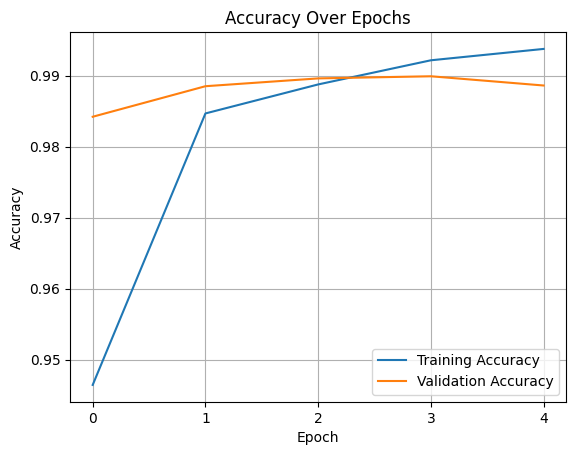

Test Accuracy: 0.9886


In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.xticks(ticks=range(5))
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Final Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

## Making Predictions

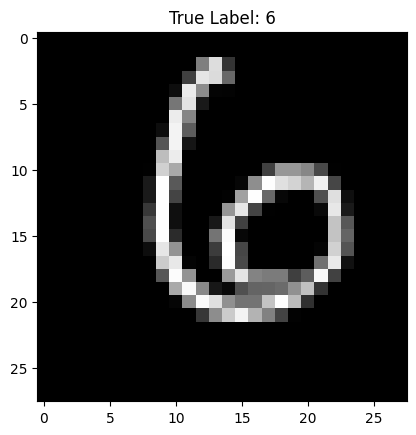

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Label: 6


In [7]:
sample_index = 100
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {sample_label}")
plt.show()

prediction = model.predict(sample_image.reshape(1,28,28,1))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")